In [1]:
#download and import data from MNIST tutorial
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [2]:
#activate Tensorflow session
import tensorflow as tf
sess = tf.InteractiveSession()

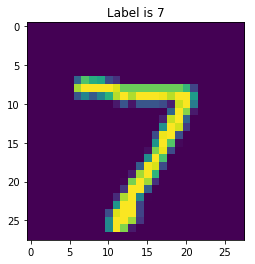

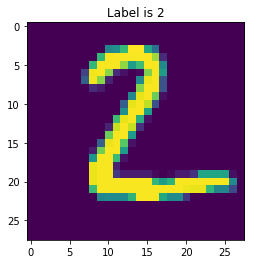

In [21]:
#generate example visuals from MNIST dataset
import matplotlib.pyplot as plt
import numpy as np

for i in range(2):
        pixels = np.array(mnist.test.images[i])

        # Reshape the array into 28 x 28 array (2-dimensional array)
        pixels = pixels.reshape((28, 28))

        plt.title('Label is {label}'.format(label=mnist.test.labels[i].tolist().index(1)))
        plt.imshow(pixels)
        plt.show()
        
        


In [3]:
#Create placeholder Tensors for image and label data
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

In [4]:
#Create weight and bias tensors for linear multiplication
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

In [5]:
#Initialize tensorflow variables above
sess.run(tf.global_variables_initializer())

In [6]:
#multiply data by weights
y = tf.matmul(x,W) + b

In [7]:
#calculate cross entropy between predictions and labels
cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))

In [8]:
#backpropagate errors, optimize using gradient descent
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [9]:
#run model for 1000 iterations, on 100 images each time
for _ in range(1000):
  batch = mnist.train.next_batch(100)
  train_step.run(feed_dict={x: batch[0], y_: batch[1]})

In [10]:
#check how many predictions were correct
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))

In [11]:
#percentage of correct predictions in decimal format
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [12]:
print(accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.9207


In [13]:
#initialize weights as a sampling from the normal distribution around 0 with std deviation 0.1
def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)
# initialize bias at 0.1
def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)

In [14]:
#convolutional layer with stride = 1 and same padding
def conv2d(x, W):
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')
#max pool layer with 2x2 patches, stride = 2, and same padding
def max_pool_2x2(x):
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

In [15]:
#weights and biases for convolution layer with 5x5 convolutions and k=32 filter
W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

In [16]:
#reshape inputs for convolutional neural network, 28x28 pixels with 1 channel
x_image = tf.reshape(x, [-1,28,28,1])

In [17]:
#first convolutional and max pooling layers
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

In [18]:
#second convolutional and max pooling layers, 5x5 convolutions and k=64 filter
W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

In [19]:
#flattening layer with 1024 units
W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

In [20]:
#dropout applied to flattened layer
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

In [21]:
#fully connected output layer
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

In [22]:
#iterate 20000 times on batches of 50, minimizing cross entropy using ADAM optimizer
cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_conv))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
sess.run(tf.global_variables_initializer())
for i in range(20000):
  batch = mnist.train.next_batch(50)
  if i%100 == 0:
    train_accuracy = accuracy.eval(feed_dict={
        x:batch[0], y_: batch[1], keep_prob: 1.0})
    print("step %d, training accuracy %g"%(i, train_accuracy))
  train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})

print("test accuracy %g"%accuracy.eval(feed_dict={
    x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))

step 0, training accuracy 0.14
step 100, training accuracy 0.84
step 200, training accuracy 0.84
step 300, training accuracy 0.94
step 400, training accuracy 0.94
step 500, training accuracy 0.88
step 600, training accuracy 0.98
step 700, training accuracy 0.94
step 800, training accuracy 0.96
step 900, training accuracy 0.96
step 1000, training accuracy 0.98
step 1100, training accuracy 0.96
step 1200, training accuracy 0.98
step 1300, training accuracy 0.98
step 1400, training accuracy 0.96
step 1500, training accuracy 0.98
step 1600, training accuracy 0.96
step 1700, training accuracy 1
step 1800, training accuracy 0.94
step 1900, training accuracy 0.98
step 2000, training accuracy 1
step 2100, training accuracy 0.96
step 2200, training accuracy 1
step 2300, training accuracy 0.98
step 2400, training accuracy 1
step 2500, training accuracy 0.94
step 2600, training accuracy 0.98
step 2700, training accuracy 1
step 2800, training accuracy 1
step 2900, training accuracy 0.98
step 3000,